In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

# Decision Tree Classifier

In [3]:
cd ~/Desktop/Tesis/Notebooks-Git/Training/StickSlip

/home/luis/Desktop/Tesis/Notebooks-Git/Training/StickSlip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns

In [5]:
df = pd.read_csv("TrainingVss.csv")

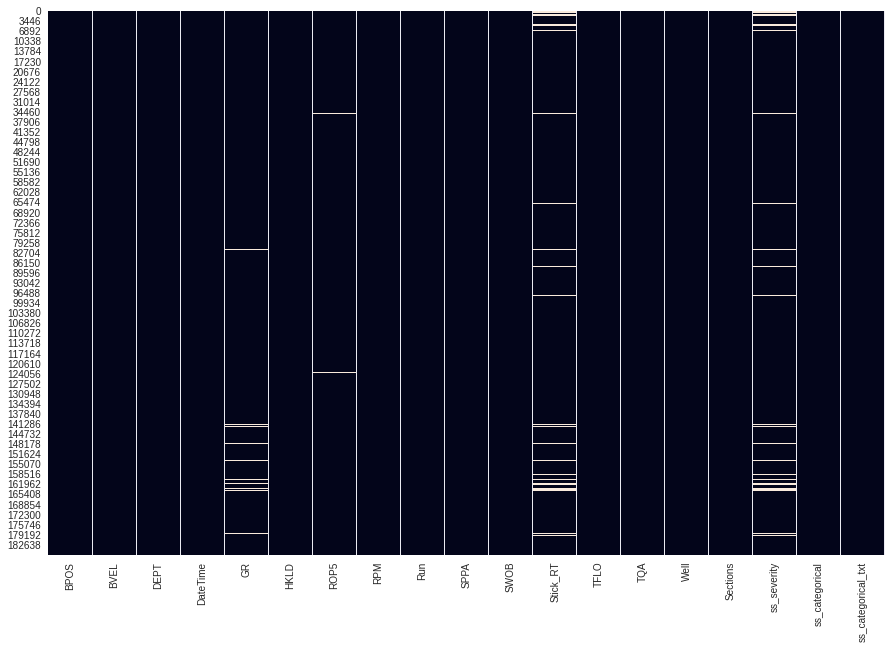

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
df.dropna(inplace=True)

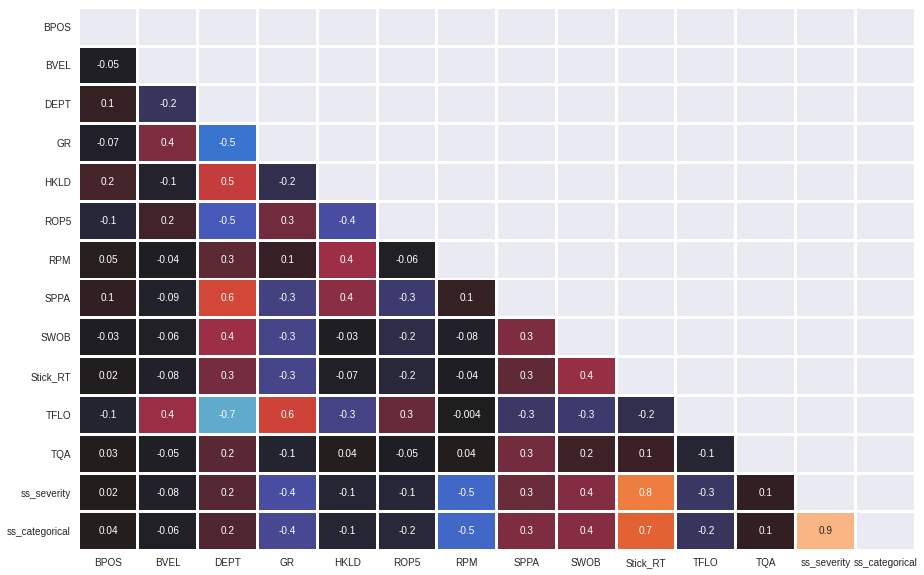

In [8]:
plt.figure(figsize=(15,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix,fmt = '.1g',linewidths=2,vmin=-1, vmax=1, center= 0,cbar=False)
plt.show()

## Splitting sets
for visual aid

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_cols_depth = ["RPM","SWOB","DEPT"]

In [11]:
X_depth = df[x_cols_depth]
Y_depth = df["ss_categorical"]
x_train_depth, x_test_depth, y_train_depth, y_test_depth = train_test_split(X_depth, Y_depth, test_size=.2, random_state=2)

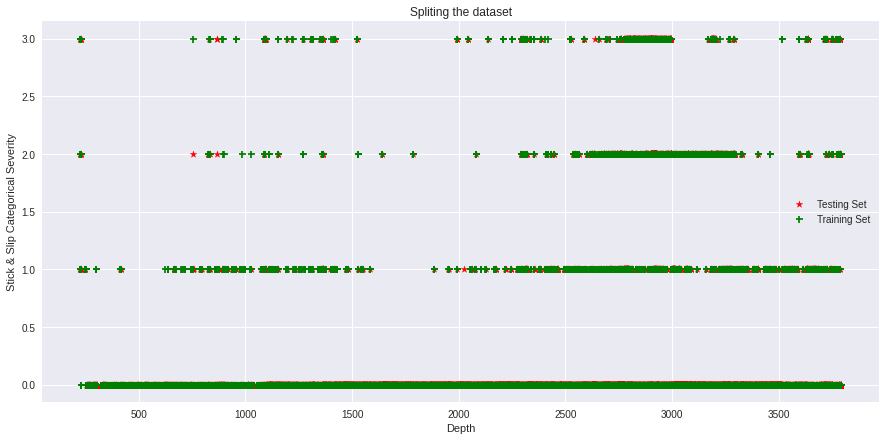

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(x_test_depth["DEPT"],y_test_depth, label = "Testing Set" ,marker = "*",color = "red")
plt.scatter(x_train_depth["DEPT"],y_train_depth,label = "Training Set", marker = "+",color="green")
plt.title("Spliting the dataset")
plt.ylabel("Stick & Slip Categorical Severity")
plt.xlabel("Depth")
plt.legend()
plt.show()

for model development

In [13]:
x_cols = ["RPM","SWOB"]

In [14]:
X = df[x_cols]
Y = df["ss_categorical"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [15]:
print("Predictors:\n\t",x_cols)
print("\nSet shapes:\t")
print("\tTraining:\n\t\tX:",x_train.shape,"\n\t\tY:",y_train.shape)
print("\tTesting:\n\t\tX:",x_test.shape,"\n\t\tY:",y_test.shape)

Predictors:
	 ['RPM', 'SWOB']

Set shapes:	
	Training:
		X: (139248, 2) 
		Y: (139248,)
	Testing:
		X: (34813, 2) 
		Y: (34813,)


## Model

In [16]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [17]:
%%time
dtc = DecisionTreeClassifier(random_state=2,max_leaf_nodes = 5).fit(x_train,y_train)

CPU times: user 280 ms, sys: 278 µs, total: 280 ms
Wall time: 291 ms


In [18]:
y_pred_train=dtc.predict(x_train)
y_pred_test=dtc.predict(x_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.8674058541349496


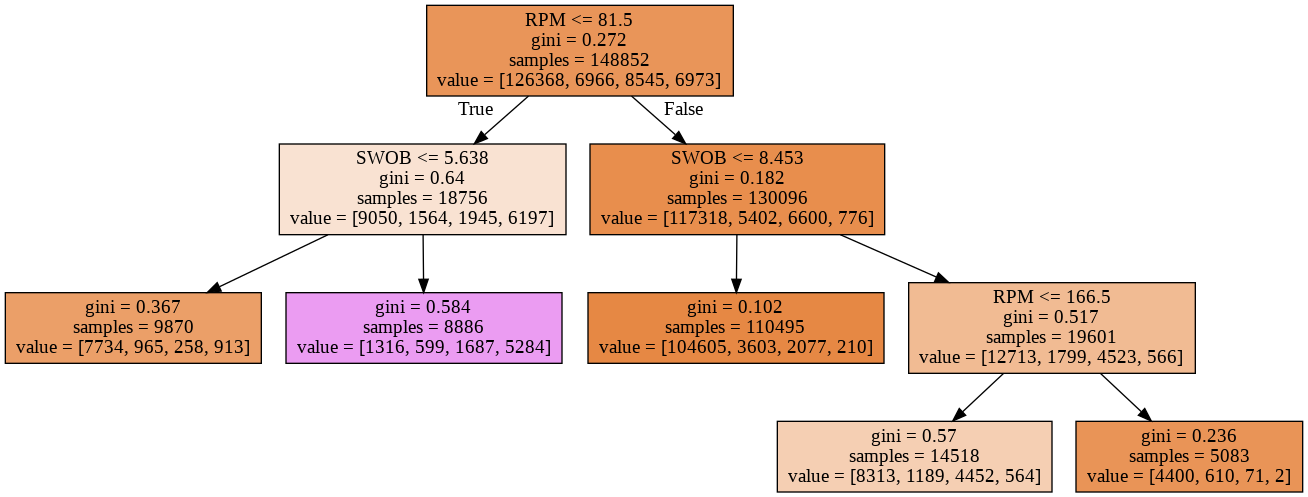

## Feature importance

In [20]:
features = np.sort(dtc.feature_importances_)

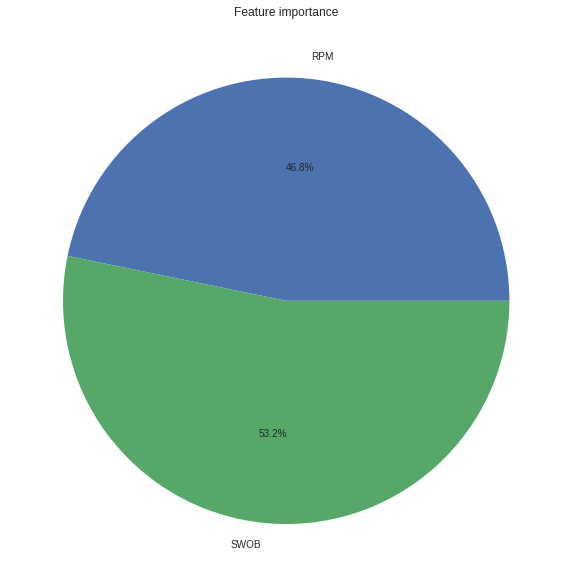

In [21]:
plt.figure(figsize=(10,15))
plt.pie(features,labels=x_cols,autopct='%1.1f%%')
plt.title("Feature importance")
plt.show()

In [22]:
probas = dtc.predict_proba(x_test)

## ROC curve analysis

In [23]:
from sklearn.metrics import roc_curve, auc

# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)

In [24]:
# get area under the curve
roc_auc = auc(fpr, tpr)

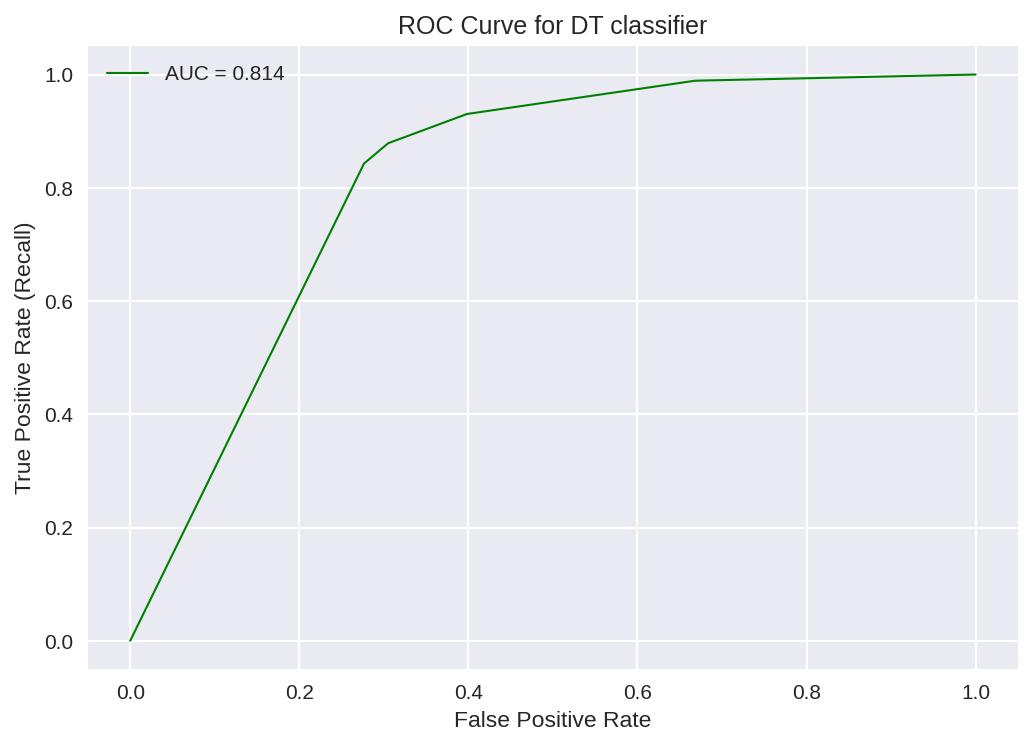

In [25]:
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for DT classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [26]:
df_dtc = df[["SWOB","RPM","Stick_RT","DEPT","ss_categorical"]]
df_dtc["Count"] = np.arange(len(df_dtc)) 
df_dtc["dtc"] = dtc.predict(X)

<ipython-input-26-7815bd03dd33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dtc["Count"] = np.arange(len(df_dtc))
<ipython-input-26-7815bd03dd33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dtc["dtc"] = dtc.predict(X)


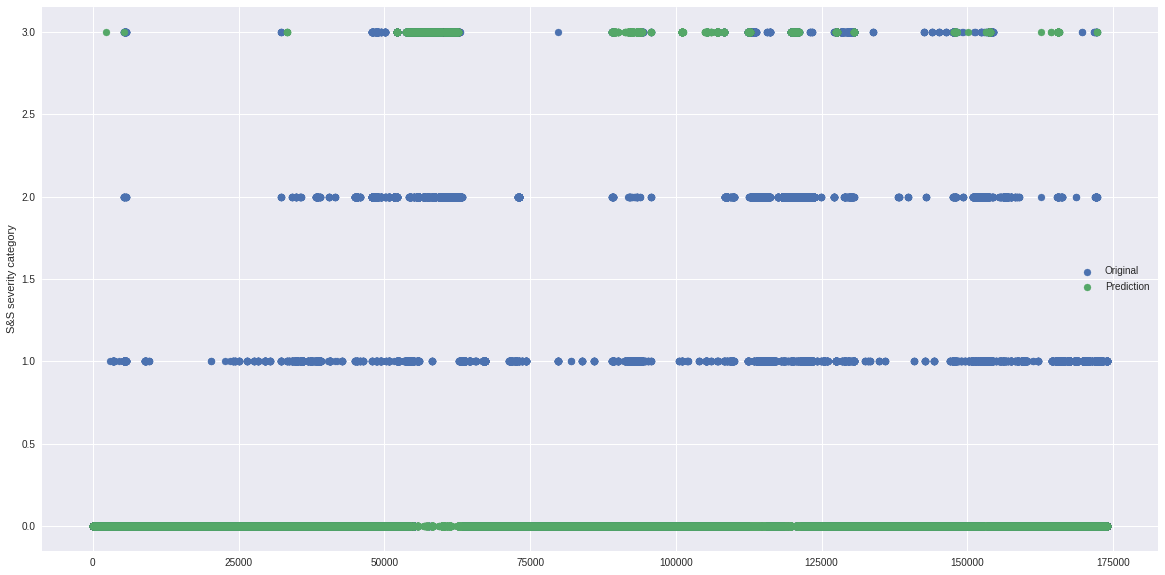

In [27]:
plt.figure(figsize = (20,10))
plt.scatter(df_dtc["Count"],df_dtc["ss_categorical"],label="Original")
plt.scatter(df_dtc["Count"],df_dtc["dtc"],label="Prediction")
plt.ylabel("S&S severity category")
plt.legend()
plt.show()